<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Auto_Model_Training_and_Evaluation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table Content**


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https:">Introduction</a></li>
        <li><a href="#downloading_data">Data Loading</a></li>
        <li><a href="#pre-processing">Dropping feature</a></li>
         <li><a href="#pre-processing">Convert target variable into binary Form</a></li>
        <li><a href="#setting_up_tree">Data Imbalanced problem </a></li>
        <li><a href="#modeling">Missing Values</a></li>
         <li><a href="#modeling">Inconsistent data/Irrelevant features</a></li>
        <li><a href="#prediction">Hot Encoding</a></li>
        <li><a href="#evaluation">Outlier Detection</a></li>
        <li><a href="#evaluation">Auto Model Training and Evaluation
        <ul>
        <li><a href="#evaluation">Decision Trees</a></li>
        <li><a href="#evaluation">Random Forest</a></li>
        <li><a href="#evaluation">Support Vector Machine</a></li>
         <li><a href="#evaluation">Logistic Regression</a></li>
         <li><a href="#evaluation">KNN</a></li>
         <li><a href="#evaluation">Naive Bayes</a></li>
         <li><a href="#evaluation">Deep Neural Multilayer Perceptron (MLP)</a></li>
         <li><a href="#evaluation">Gradient Boosting</a></li>
         <li><a href="#evaluation">ExtraTreesClassifier</a></li>
         <li><a href="#evaluation">LGBM Classifer</a></li>
         <li><a href="#evaluation">CatBoost</a></li>
    </ul>
</div>
<br>
<hr>


# **1- Introduction** 

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.

# **Import libaray**

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

# **2- Data Loading**

## **2.1 Data Loading from Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd 
Train_data = pd.read_csv('/content/drive/MyDrive/Datasets/Water Brone diesease/Malyria_2-21-2021.csv',encoding = 'latin')

In [ ]:
Train_data

**Free Builten Dataset**

**Wine Dataset**

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()

for line in wine.DESCR.split("\n")[5:29]:
    print(line)

wine_df = pd.DataFrame(data=wine.data, columns = wine.feature_names)
wine_df["WineType"] = wine.target

wine_df.head()

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineType
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


**Breast Cancer Dataset**


In [ ]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

for line in breast_cancer.DESCR.split("\n")[5:31]:
    print(line)

breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns = breast_cancer.feature_names)
breast_cancer_df["TumorType"] = breast_cancer.target

breast_cancer_df.head()

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
       

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TumorType
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


**Boston Housing Dataset**


In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()

for line in boston.DESCR.split("\n")[5:29]:
    print(line)

boston_df = pd.DataFrame(data=boston.data, columns = boston.feature_names)
boston_df["Price"] = boston.target

boston_df.head()

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# **3- Dropping feature**

Dropping feature usually isn’t recommended because you’re losing information. But if you’re sure that the column isn’t important, or simply has too many missing values, you can choose to drop them. For example, for this dataset, the host_name column was removed for ethical reasons, and id was removed because it was was unnecessary.
To drop features, use drop and set axis to 1 and inplace to true. Axis is 1 because we want to drop columns (0 means row), and inplace is True because you're transforming it directly on your dataset.

## **3.1 Drop Index Columns**

In [5]:
Train_data=Train_data.reset_index()
Train_data=Train_data.drop(columns=['index'])

## **3.2 Drop Multiple featurs**

In [6]:
New5=Train_data.drop(Train_data.columns[[0,1,3,4,5,6,7,10,17]], axis=1, inplace=True)

# **4-Convert target variable into binary Form**

In [7]:
Train_data['RESULT_TEXT'].replace({'Negative': 0, 'Positive': 1},inplace = True)

# **5- Data Imbalanced problem**


## **5.1 Check Imbalanced Problem in Data**

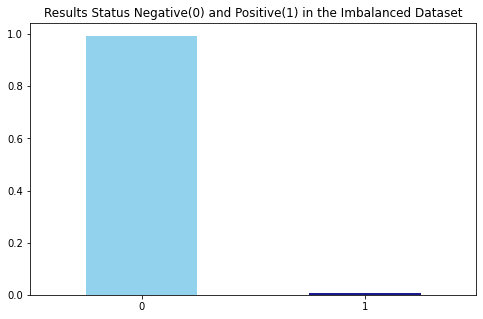

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
Train_data.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Results Status Negative(0) and Positive(1) in the Imbalanced Dataset')
plt.show()

## **5.2 Data resample**

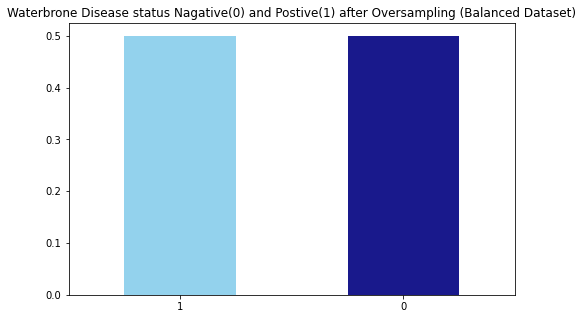

In [9]:
from sklearn.utils import resample
no = Train_data[Train_data.RESULT_TEXT == 0]
yes = Train_data[Train_data.RESULT_TEXT == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])
fig = plt.figure(figsize = (8,5))
oversampled.RESULT_TEXT.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('Waterbrone Disease status Nagative(0) and Postive(1) after Oversampling (Balanced Dataset)')
plt.show()

#**6- Missing Values** 

## **6.2- Check missing Value**

In [ ]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
REPORT_VERIFIED,796,0.01749
RESULT_TEXT,0,0.00000
CPT_ID.1,0,0.00000
RESULT_VALUE,0,0.00000


# **8-Hot Encoding**

In [10]:
oversampled.select_dtypes(include=['object']).columns


Index(['MRNO', 'AGE', 'GENDER', 'DISTRICT', 'TEHSIL', 'REPORT_VERIFIED',
       'RESULT_VALUE'],
      dtype='object')

In [11]:
# Impute categorical var with Mode
oversampled['MRNO'] = oversampled['MRNO'].fillna(oversampled['MRNO'].mode()[0])
oversampled['AGE'] = oversampled['AGE'].fillna(oversampled['AGE'].mode()[0])
oversampled['GENDER'] = oversampled['GENDER'].fillna(oversampled['GENDER'].mode()[0])
oversampled['DISTRICT'] = oversampled['DISTRICT'].fillna(oversampled['DISTRICT'].mode()[0])
oversampled['TEHSIL'] = oversampled['TEHSIL'].fillna(oversampled['TEHSIL'].mode()[0])
oversampled['REPORT_VERIFIED'] = oversampled['REPORT_VERIFIED'].fillna(oversampled['REPORT_VERIFIED'].mode()[0])
oversampled['RESULT_VALUE'] = oversampled['RESULT_VALUE'].fillna(oversampled['RESULT_VALUE'].mode()[0])

In [12]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [13]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [14]:
MiceImputed

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE,CPT_ID.1,RESULT_TEXT
0,10368.0,30.0,1.0,0.0,54.0,3947.0,1.000000e+15,1.0,1.000000e+15,0.0
1,10373.0,41.0,1.0,0.0,1.0,21463.0,1.000000e+15,1.0,1.000000e+15,0.0
2,10373.0,41.0,1.0,0.0,1.0,21462.0,1.000000e+15,1.0,1.000000e+15,0.0
3,10312.0,23.0,1.0,0.0,1.0,10809.0,1.000000e+15,1.0,1.000000e+15,0.0
4,10313.0,40.0,1.0,0.0,1.0,12521.0,1.000000e+15,1.0,1.000000e+15,0.0
...,...,...,...,...,...,...,...,...,...,...
13513,7286.0,84.0,1.0,0.0,1.0,8439.0,1.000000e+15,1.0,1.000000e+15,1.0
8974,744.0,9.0,1.0,0.0,1.0,10606.0,1.000000e+15,1.0,1.000000e+15,1.0
18480,4737.0,20.0,1.0,0.0,1.0,12356.0,1.000000e+15,1.0,1.000000e+15,1.0
20294,697.0,72.0,0.0,21.0,36.0,10352.0,1.000000e+15,1.0,1.000000e+15,1.0


# **11- Auto Model Training and Evaluation**

## **11.1-PyCaret**

PyCaret is an open-source, low-code machine learning library and end-to-end model management tool built-in Python for automating machine learning workflows. It is incredibly popular for its ease of use, simplicity, and ability to build and deploy end-to-end ML prototypes quickly and efficiently.PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with few lines only. This makes the experiment cycle exponentially fast and efficient [1]

PyCaret is simple and easy to use. All the operations performed in PyCaret are sequentially stored in a Pipeline that is fully automated for deployment. Whether it’s imputing missing values, one-hot-encoding, transforming categorical data, feature engineering, or even hyperparameter tuning, PyCaret automates all of it.

### **Installing Pycaret**

In [15]:
#capture #suppresses the displays
# install the full version
!pip install pycaret[full]

In [16]:
!pip install pyyaml==5.4.1


By installing the full version of pycaret, all the optional dependencies as listed here are also installed.

###**Import the necessary packages**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 
import pycaret
from pycaret.regression import *
from pycaret.classification import *


### **Classificaiton**

**Models Training**

In [ ]:
clf = setup(MiceImputed, target = "RESULT_TEXT",
            ignore_features=["CPT_ID.1"], 
            silent = True, session_id = 786, use_gpu =True,
            preprocess=True,
            log_data=True,
            log_experiment=True,
            normalize=True)

setup function in PyCaret, profiles the dataset and infers the data types for all input features. It is the first and the only mandatory step to start any machine learning experiment in PyCaret.

**Model Evulaiton**

This function trains all the available models in the model library using default hyperparameters and evaluates performance metrics using cross-validation. The number of folds can be defined using the foldparameter (default = 10 folds). The table is sorted (highest to lowest) by the metric of choice which can be defined using the sortparameter(in this case we have sorted it on RMSE)
n_select parameter in the setup function controls the return of trained models. In this case, I am setting it to 15, meaning return the top 15 models as a list. pull function in the second line stores the output of compare_models as pd.DataFrame .

In [18]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9997,1.0000,1.0000,0.9993,0.9997,0.9993,0.9993,2.365
et,Extra Trees Classifier,0.9995,1.0000,1.0000,0.9989,0.9995,0.9989,0.9989,1.917
dt,Decision Tree Classifier,0.9976,0.9977,1.0000,0.9953,0.9976,0.9953,0.9953,0.082
catboost,CatBoost Classifier,0.9975,1.0000,1.0000,0.9950,0.9975,0.9950,0.9951,8.176
lightgbm,Light Gradient Boosting Machine,0.9933,0.9998,1.0000,0.9868,0.9933,0.9866,0.9867,0.378
knn,K Neighbors Classifier,0.9928,0.9981,1.0000,0.9858,0.9928,0.9856,0.9857,0.962
gbc,Gradient Boosting Classifier,0.9147,0.9703,0.9439,0.8912,0.9168,0.8293,0.8308,2.693
ada,Ada Boost Classifier,0.7855,0.8869,0.7679,0.7947,0.7808,0.5709,0.5715,0.994
svm,SVM - Linear Kernel,0.6109,0.0000,0.3332,0.7442,0.4600,0.2201,0.2638,0.156
lr,Logistic Regression,0.6105,0.6827,0.4984,0.6399,0.5603,0.2202,0.2258,0.112


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=786, verbose=0,
                       warm_start=False)

**Select Best Model**


In [19]:
best= compare_models(n_select = 2, sort= 'Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9997,1.0000,1.0000,0.9993,0.9997,0.9993,0.9993,2.341
et,Extra Trees Classifier,0.9995,1.0000,1.0000,0.9989,0.9995,0.9989,0.9989,1.911
dt,Decision Tree Classifier,0.9976,0.9977,1.0000,0.9953,0.9976,0.9953,0.9953,0.081
catboost,CatBoost Classifier,0.9975,1.0000,1.0000,0.9950,0.9975,0.9950,0.9951,8.215
lightgbm,Light Gradient Boosting Machine,0.9933,0.9998,1.0000,0.9868,0.9933,0.9866,0.9867,0.381
knn,K Neighbors Classifier,0.9928,0.9981,1.0000,0.9858,0.9928,0.9856,0.9857,0.812
gbc,Gradient Boosting Classifier,0.9147,0.9703,0.9439,0.8912,0.9168,0.8293,0.8308,2.690
ada,Ada Boost Classifier,0.7855,0.8869,0.7679,0.7947,0.7808,0.5709,0.5715,0.962
svm,SVM - Linear Kernel,0.6109,0.0000,0.3332,0.7442,0.4600,0.2201,0.2638,0.155
lr,Logistic Regression,0.6105,0.6827,0.4984,0.6399,0.5603,0.2202,0.2258,0.117


In [ ]:
compare_model_result = pull()



since the RandomForestregressor was evaluated to have a comparatively better Accuracy, let us build the model using RandomForestregressor

**Build the model using Best MODEL**

In [20]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9994,1.0,1.0,0.9987,0.9994,0.9987,0.9987
1,0.9997,1.0,1.0,0.9994,0.9997,0.9994,0.9994
2,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000
3,0.9994,1.0,1.0,0.9987,0.9994,0.9987,0.9987
4,0.9997,1.0,1.0,0.9994,0.9997,0.9994,0.9994
5,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000
7,0.9991,1.0,1.0,0.9981,0.9991,0.9981,0.9981
8,0.9994,1.0,1.0,0.9987,0.9994,0.9987,0.9987
9,1.0000,1.0,1.0,1.0000,1.0000,1.0000,1.0000


**Hyperparameter tuning**



In [ ]:
tuned_rf= tune_model(rf, optimize='Accuracy', search_library='optuna')

Optimum Hyperparameters selected by using Optuna


In [ ]:
tuned_rf

**Analyze the Model Performance**


In [ ]:
plot_model(tuned_rf)

**Interpret the results**


In PyCaret, we can interpret the model by SHAP values and correlation plot with just one line of code

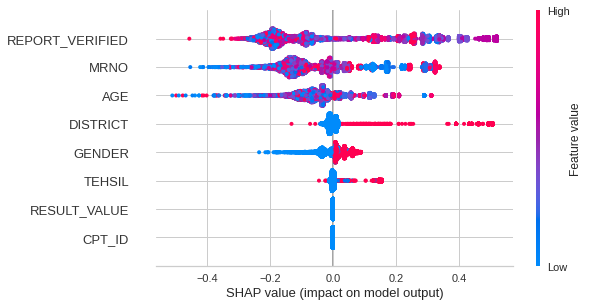

In [ ]:
interpret_model(tuned_rf)

**Evaluate the Model**


If we do not want to plot all these visualizations individually, then the PyCaret library has another amazing function — evaluate_model. In this function, you just need to pass the model object and PyCaret will create an interactive window for you to see and analyze the model in all the possible ways:

In [ ]:
evaluate_model(tuned_rf)

**Evaluate the model on the holdout set used for validation**


In [23]:
val_rf_pred = predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9492,0.9897,0.9945,0.9126,0.9518,0.8983,0.902


In [25]:
#The predictions (Label) made is as follows:-
val_rf_pred

,MRNO,AGE,GENDER,DISTRICT,TEHSIL,REPORT_VERIFIED,CPT_ID,RESULT_VALUE_0.0,RESULT_TEXT,Label,Score
0,0.588281,-0.586727,-1.227247,-0.528467,-0.525280,0.091290,0.0,0.0,0.0,0.0,0.6075
1,0.947049,-0.634861,-1.227247,2.160462,1.876374,1.356114,0.0,0.0,0.0,0.0,0.6574
2,-1.455078,-1.068062,0.814405,-0.528467,-0.525280,-0.129226,0.0,0.0,1.0,1.0,0.7977
3,-1.588385,-0.490460,0.814405,-0.528467,-0.525280,-0.581086,0.0,0.0,1.0,1.0,0.8995
4,0.440774,2.541948,0.814405,-0.528467,-0.525280,-0.476161,0.0,0.0,1.0,1.0,0.7575
...,...,...,...,...,...,...,...,...,...,...,...
13649,-0.449483,1.434878,-1.227247,-0.528467,-0.525280,-0.457374,0.0,0.0,1.0,1.0,0.7346
13650,0.547419,1.434878,-1.227247,-0.528467,-0.525280,-0.032263,0.0,0.0,0.0,0.0,0.5676
13651,-1.185567,1.868080,-1.227247,-0.528467,-0.525280,1.419960,0.0,0.0,0.0,0.0,1.0000
13652,-1.638520,1.146078,-1.227247,-0.528467,-0.525280,-0.672795,0.0,0.0,0.0,0.0,0.9941


**Make predictions on test data**


In [ ]:
# predictions on new datasetRESULT_TEXT
pred_new_rf = predict_model(tuned_rf, MiceImputed = test) #new_data is pd dataframe
#pred_new_rf = pred_new_rf.rename(columns={‘RESULT_TEXT’:’prediction’})
pred_new_rf = pred_new_rf.rename(columns={'RESULT_TEXT':'prediction'})

### **Model Tunning**

**GridSearchCV**



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
n_samples = 24187
n_features = 9

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(random_state=1), cv=3, n_jobs=-1, verbose=5,
                    param_grid ={
                    'criterion': ['gini', 'entropy'],
                    'max_depth': [None,1,2,3,4,5,6,7],
                    'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7, n_features//2, n_features//3, ],
                    'min_samples_split': [2,0.3,0.5, n_samples//2, n_samples//3, n_samples//5],
                    'min_samples_leaf':[1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//5]},
                    )

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

In [ ]:
y_train

In [ ]:
MiceImputed

### **Create DT Rules**

**DT Rules**

In [ ]:
target = list(MiceImputed['RESULT_TEXT'].unique())
feature_names = list(X_train.columns)

In [ ]:
target

In [ ]:
from sklearn.tree import export_text
r = export_text(DTC_Model, feature_names=feature_names)
print(r)

### **Visualization**

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(DTC_Model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True)



##**11.2-Random Forest**

### **Model training**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
RF= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=10)
RF_model= RF.fit(X_train , y_train)
RF_model

### **Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = RF_model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_RF = RF_model.predict(X_test)
RF_Acc=RF_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(RF_model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CR_RF=confusion_matrix(y_test, y_pred_RF)
print(CR_RF)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR_RF,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_RF=classification_report(y_test, y_pred_RF)
print(CR_RF)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_RF, tpr_RF, thresholds = roc_curve(y_test, y_pred_RF)
roc_auc_RF = auc(fpr_RF, tpr_RF)
plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_RF)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
n_samples = 24187
n_features = 9

In [ ]:
params = {'n_estimators': [20,50,100],
          'max_depth': [None, 2, 5,],
          'min_samples_split': [2, 0.5, n_samples//2, ],
          'min_samples_leaf': [1, 0.5, n_samples//2, ],
          'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5, n_features//2, ],
          'bootstrap':[True, False]
         }

In [ ]:
rf_classifier_grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid=params, n_jobs=-1, cv=3, verbose=1)
rf_classifier_grid.fit(X_train,y_train)

In [ ]:
print('Train Accuracy : %.3f'%rf_classifier_grid.best_estimator_.score(X_train, y_train))
print('Test Accurqacy : %.3f'%rf_classifier_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%rf_classifier_grid.best_score_)
print('Best Parameters : ',rf_classifier_grid.best_params_)

## **11.3-SVM Support Vector Machine**

### **Model Training**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC, SVC
from sklearn import svm

In [ ]:

svc=svm.LinearSVC()

SVM_Model= svc.fit(X_train , y_train)
SVM_Model

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = SVM_Model._predict_proba_lr(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_SVM = SVM_Model.predict(X_test)
SVM_Acc=SVM_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(SVM_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_SVM=confusion_matrix(y_test, y_pred_SVM)
print(CR_SVM)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_SVM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_SVM=classification_report(y_test, y_pred_SVM)
print(CR_SVM)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_SVM, tpr_SVM, thresholds = roc_curve(y_test, y_pred_SVM)
roc_auc_SVM = auc(fpr_SVM, tpr_SVM)
plt.figure()
plt.plot(fpr_SVM, tpr_SVM, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_SVM)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVC, SVC
from sklearn import svm


In [ ]:
params = {
            'C': [0.1, 0.5, 1.0, 10.0],
         }

In [ ]:
linear_svc_classifier_grid = GridSearchCV(LinearSVC(random_state=1, max_iter=1000000), param_grid=params, n_jobs=-1, cv=5, verbose=5)
linear_svc_classifier_grid.fit(X_train,y_train)


In [ ]:
print('Train Accuracy : %.3f'%linear_svc_classifier_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%linear_svc_classifier_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%linear_svc_classifier_grid.best_score_)
print('Best Parameters : ',linear_svc_classifier_grid.best_params_)

## **11.4-Logistic Regression(LR)**

### **Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
LR= LogisticRegression()
LR_Model= LR.fit(X_train , y_train)
LR_Model

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = LR_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_LR = LR.predict(X_test)
LR_Acc=LR_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LR_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_LR=confusion_matrix(y_test, y_pred_LR)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_LR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_LR=classification_report(y_test, y_pred_LR)
print(CR_LR)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_LR, tpr_LR, thresholds = roc_curve(y_test, y_pred_LR)
roc_auc_LR = auc(fpr_LR, tpr_LR)
plt.figure()
plt.plot(fpr_LR, tpr_LR, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_LR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

## **11.5 KNN Algorithm**

### **Model Training**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN_Model= KNN.fit(X_train , y_train)
KNN_Model

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = KNN_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_KNN = KNN.predict(X_test)
KNN_Acc=KNN_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(KNN_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_KNN=confusion_matrix(y_test, y_pred_KNN)
print(CM_KNN)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_KNN,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_KNN=classification_report(y_test, y_pred_KNN)
print(CM_KNN)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_KNN, tpr_KNN, thresholds = roc_curve(y_test, y_pred_KNN)
roc_auc_KNN = auc(fpr_KNN, tpr_KNN)
plt.figure()
plt.plot(fpr_KNN, tpr_KNN, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_KNN)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model tunning**

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [ ]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [ ]:
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)

In [ ]:
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

In [ ]:
print('Train Accuracy : %.3f'%grid_search.score(X_train, y_train))
print('Test Accurqacy : %.3f'%grid_search.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%grid_search.best_score_)
print('Best Parameters : ',grid_search.best_params_)

## **11.6-Naive Bayes (NB)**

### **Modle Training**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:

NB = GaussianNB()
NB_Model= NB.fit(X_train , y_train)
NB_Model

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = NB_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_NB = NB_Model.predict(X_test)
NB_Acc=NB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(NB_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_NB=confusion_matrix(y_test, y_pred_NB)
print(CM_NB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_NB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_NB=classification_report(y_test, y_pred_NB)
print(CM_NB)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc


In [ ]:
fpr_NB, tpr_NB, thresholds = roc_curve(y_test, y_pred_NB)
roc_auc_NB = auc(fpr_NB, tpr_NB)
plt.figure()
plt.plot(fpr_NB, tpr_NB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_NB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model tunning**

**GridSearchCV**

In [ ]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

In [ ]:
from sklearn.naive_bayes import ComplementNB

complement_nb = ComplementNB()

In [ ]:
complement_nb_grid = GridSearchCV(ComplementNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
complement_nb_grid.fit(X_train,y_train)

In [ ]:
print('Train Accuracy : %.3f'%complement_nb_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%complement_nb_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%complement_nb_grid.best_score_)
print('Best Parameters : ',complement_nb_grid.best_params_)

## **11.7- Deep Neural Multilayer Perceptron (MLP)**

### **Model Training**

In [ ]:
from sklearn.neural_network import MLPClassifier
NN=MLPClassifier()
NN_Model= NN.fit(X_train , y_train)
NN_Model

### **Model Evulation**

**Predict Class Probability**

In [ ]:
preds_proba = NN_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_NN = NN.predict(X_test)
NN_Acc=NN_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(NN_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_NN=confusion_matrix(y_test, y_pred_NN)
print(CM_NN)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_NN,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CM_NN=classification_report(y_test, y_pred_NN)
print(CM_NN)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_NN, tpr_NN, thresholds = roc_curve(y_test, y_pred_NN)
roc_auc_NN = auc(fpr_NN, tpr_NN)
plt.figure()
plt.plot(fpr_NN, tpr_NN, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_NN)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

**GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'activation': ['relu', 'tanh', 'logistic', 'identity'],
          'hidden_layer_sizes': [(100,), (50,100,), (50,75,100,)],
          'solver': ['adam', 'sgd', 'lbfgs'],
          'learning_rate' : ['constant', 'adaptive', 'invscaling']}

In [ ]:
mlp_classif_grid = GridSearchCV(MLPClassifier(random_state=123), param_grid=params, n_jobs=-1, cv=5, verbose=5)
mlp_classif_grid.fit(X_train,y_train)

In [ ]:
print('Train Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%mlp_classif_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%mlp_classif_grid.best_score_)
print('Best Parameters : ',mlp_classif_grid.best_params_)

## **11.8- XGBoost or Gradient Boosting (GB)**

### **Model Training**

In [ ]:
from xgboost import XGBClassifier
GB=XGBClassifier()
GB_Model= GB.fit(X_train , y_train)
GB_Model

### **Model Evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = GB_Model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_GB = GB.predict(X_test)
GB_Acc=GB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(GB_Model.score(X_test, y_test)))

**Confusion Matrix**

In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print('\n')
print("confusion matrix")
print('\n')
CM_GB=confusion_matrix(y_test, y_pred_GB)
print(CM_GB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_GB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**



In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_GB=classification_report(y_test, y_pred_GB)
print(CR_GB)
print('\n')

**ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
fpr_GB, tpr_GB, thresholds = roc_curve(y_test, y_pred_GB)
roc_auc_GB = auc(fpr_GB, tpr_GB)
plt.figure()
plt.plot(fpr_GB, tpr_GB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_GB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model tunning**

**GridSearchCV**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [ ]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [ ]:
grid_search.fit(X_train,y_train)


In [ ]:
print('Train Accuracy : %.3f'%grid_search.best_estimator_.score(X_train, y_train))
print('Test Accurqacy : %.3f'%grid_search.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%grid_search.best_score_)
print('Best Parameters : ',grid_search.best_params_)

## 11.9 **ExtraTreeClassifier(ET)**

### **Model Training**

In [ ]:
from sklearn.tree import ExtraTreeClassifier
ET=ExtraTreeClassifier(random_state=0, max_depth=2)
ET_model= ET.fit(X_train , y_train)
ET_model

### **Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = ET_model.predict_proba(X_test)
print("class = ", preds_proba)

**Accuracy**

In [ ]:
y_pred_ET = ET_model.predict(X_test)
ET_Acc=ET_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(ET_model.score(X_test, y_test)))

**Confusion Matrix**



In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_ET=confusion_matrix(y_test, y_pred_ET)
print(CM_ET)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_ET,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_ET=classification_report(y_test, y_pred_ET)
print(CR_ET)
print('\n')

**ROC CURVE**



In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_ET, tpr_ET, thresholds = roc_curve(y_test, y_pred_ET)
roc_auc_ET = auc(fpr_ET, tpr_ET)
plt.figure()
plt.plot(fpr_ET, tpr_ET, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_ET)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model tunning**

**Grid Search**

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
n_samples = 24187
n_features = 9

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import ExtraTreeClassifier

In [ ]:
grid = GridSearchCV(ExtraTreeClassifier(random_state=1), cv=3, n_jobs=-1, verbose=5,
                    param_grid ={
                    'criterion': ['gini', 'entropy'],
                    'max_depth': [None,1,2,3,4,5,6,7],
                    'max_features': [None, 'sqrt', 'auto', 'log2', 0.3,0.5,0.7, n_features//2, n_features//3, ],
                    'min_samples_split': [2,0.3,0.5, n_samples//2, n_samples//3, n_samples//5],
                    'min_samples_leaf':[1, 0.3,0.5, n_samples//2, n_samples//3, n_samples//5]},
                    )

In [ ]:
grid.fit(X_train, y_train)


In [ ]:
print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

## **11.10 LGBMClassifier**

### **Model Training**

In [ ]:
import lightgbm as lgb
LGBM = lgb.LGBMClassifier(objective="binary", n_estimators=10)
LGBM_model= LGBM.fit(X_train , y_train)
LGBM_model

### **Model evaluation**

**Predict Class Probability**

In [ ]:
preds_proba = LGBM_model.predict_proba(X_test)
print("class = ", preds_proba)


**Accuracy**

In [ ]:
y_pred_LGBM = LGBM_model.predict(X_test)
LGBM_Acc=LGBM_model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(LGBM_model.score(X_test, y_test)))

**Confusion Matrix**



In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_LGBM=confusion_matrix(y_test, y_pred_LGBM)
print(CM_LGBM)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_LGBM,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**



In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_LGBM=classification_report(y_test, y_pred_LGBM)
print(CR_LGBM)
print('\n')

**ROC CURVE**



In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_LGBM, tpr_LGBM, thresholds = roc_curve(y_test, y_pred_LGBM)
roc_auc_LGBM = auc(fpr_LGBM, tpr_LGBM)
plt.figure()
plt.plot(fpr_LGBM, tpr_LGBM, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_LGBM)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

In [ ]:
n_samples = 24187
n_features = 9

In [ ]:
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

In [ ]:
params = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

In [ ]:

LGBM = lgb.LGBMClassifier(objective="binary", n_estimators=10)
rf_classifier_grid = GridSearchCV(estimator=LGBM, param_grid=params)
rf_classifier_grid.fit(X_train,y_train)

In [ ]:
print('Train Accuracy : %.3f'%rf_classifier_grid.best_estimator_.score(X_train, y_train))
print('Test Accurqacy : %.3f'%rf_classifier_grid.best_estimator_.score(X_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%rf_classifier_grid.best_score_)
print('Best Parameters : ',rf_classifier_grid.best_params_)

## **11.11 CatBoost**

### **Model Training**


In [ ]:
! pip install catboost

In [ ]:

from catboost import CatBoostClassifier, Pool

In [ ]:

#CTB = CatBoost(params={'iterations':100, 'verbose':10, 'loss_function':'Logloss'})
CTB= CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

CTB_Model= CTB.fit(X_train , y_train)
CTB_Model

### **Model evaluation**


**Predict Class Probability**

In [ ]:
preds_class = CTB_Model.predict(X_test)
preds_proba = CTB_Model.predict_proba(X_test)
print("class = ", preds_class)
print("proba = ", preds_proba)

**Accuracy**



In [ ]:

y_pred_CTB = CTB_Model.predict(X_test)
CTB_Acc=CTB_Model.score(X_test, y_test)
print('Accuracy score= {:.4f}'.format(CTB_Model.score(X_test, y_test)))

**Confusion Matrix**



In [ ]:
from mlxtend.plotting import plot_confusion_matrix 
from sklearn.metrics import classification_report, confusion_matrix
print('\n')
print("confusion matrix")
print('\n')
CM_CTB=confusion_matrix(y_test, y_pred_CTB)
print(CM_CTB)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CM_CTB,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

**Precision, Recall, F1**

In [ ]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR_CTB=classification_report(y_test, y_pred_CTB)
print(CR_CTB)
print('\n')

**ROC CURVE**



In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_CTB, tpr_CTB, thresholds = roc_curve(y_test, y_pred_CTB)
roc_auc_CTB = auc(fpr_CTB, tpr_CTB)
plt.figure()
plt.plot(fpr_CTB, tpr_CTB, color='darkorange', lw=1, label='ROC curve (area = %0.4f)' % roc_auc_CTB)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

### **Model Tunning**

# **12-Compare Modle performance**

## **12.1-ROC Curve for Models**

In [ ]:
plt.plot(fpr_DT, tpr_DT, marker='*', label='Decision Trees', color = 'black')
plt.plot(fpr_RF, tpr_RF, marker='*', label='Random Forest', color = 'Red')
plt.plot(fpr_SVM, tpr_SVM, marker='*', label='SVM', color = 'green')
plt.plot(fpr_LR, tpr_LR, marker='*', label='LogisticRegression', color = 'yellow')
plt.plot(fpr_KNN, tpr_KNN, marker='*', label='KNN', color = 'blue')
plt.plot(fpr_NB, tpr_NB, marker='*', label='Naive Bayes', color = 'black')
plt.plot(fpr_NN, tpr_NN, marker='*', label='Neural Network(NN)', color = 'black')
plt.plot(fpr_NN, tpr_NN, marker='*', label='Gradient Boosting(GB)', color = 'black')
plt.plot(fpr_ET, tpr_ET, marker='*', label='Etra Tree Classifier(ET)', color = 'black')
plt.plot(fpr_LGBM, tpr_LGBM, marker='*', label='LGBMClassifer', color = 'black')
plt.plot(fpr_CTB, tpr_CTB, marker='*', label='CatBoost', color = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVES OF ALGORITHMS')
plt.legend(loc="lower right")
plt.show()

## **12.2-Comparison of all algorithms Results**

In [ ]:
from prettytable import PrettyTable

In [ ]:
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["Decision Trees Algorithm", round(DT_Acc,4)])
x.add_row(["Random Forest Algorithm", round(RF_Acc,4)])
x.add_row(["Support Vector Machine Algorithm", round(SVM_Acc,4)])
x.add_row(["LogisticRegression Algorithm", round(LR_Acc,4)])
x.add_row(["KNN Algorithm", round(KNN_Acc,4)])
x.add_row(["Naive Bayes", round(NB_Acc,4)])
x.add_row(["Neural Network", round(NN_Acc,4)])
x.add_row(["Gradient Boosting", round(GB_Acc,4)])
x.add_row(["ExtraTree Classifer ", round(ET_Acc,4)])
x.add_row(["LGBM Classifier ", round(LGBM_Acc,4)])
x.add_row(["CatBoost ", round(CTB_Acc,4)])
print(x)
print('\n')

# **References**

[1-Build a machine learning model with PyCaret and corresponding user interface with Gradio](https://medium.com/nerd-for-tech/build-a-machine-learning-model-with-pycaret-and-corresponding-user-interface-with-gradio-57ff09b7d262)

[2-PyCaret in Machine Learning](https://thecleverprogrammer.com/2021/03/07/pycaret-in-machine-learning/)